## Introduction

As a part-time tutor who also dabbles in data science, I have several students who are struggling to understand what the future holds for them and how standardized tests fit into their life path. They are feeling overwhelmed with all the data around "acceptable test scores" for various schools and majors. They want a good education, but need some help narrowing down the choices for majors and schools, based on their target (or expected) SAT score range. The purpose of this project is to help explore existing score data and how it relates to various majors and colleges for college-bound students.

### Our data sets
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major

* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges


### Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|intended_major|object|2019 SAT Scores by Intended College Major|The name of various majors and fields of interest for prospective college-bound applicants.| 
|test_takers_per_major|float|2019 SAT Scores by Intended College Major|The number of test takers who are interested in major| 
|percent_of_total_decimal|float|2019 SAT Scores by Intended College Major|Percent of total expressed as a decimal| 
|total_accepted|int|2019 SAT Scores by Intended College Major|Total number of students accepted for the intended major| 
|reading_writing_sat_score|int|2019 SAT Scores by Intended College Major|Score for the reading and writing SAT section| 
|math_sat_score|int|2019 SAT Scores by Intended College Major|Score for the reading and writing Math section| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|school_name|obj|Ranges of Accepted ACT & SAT Student Scores by Colleges|Name of the University or College |
|number_applicants|int|Ranges of Accepted ACT & SAT Student Scores by Colleges|Number of applicants for this college|
|acceptance_rate|float64|Ranges of Accepted ACT & SAT Student Scores by Colleges|Acceptance rate as a decimal|
|sat_quartile_range|object|Ranges of Accepted ACT & SAT Student Scores by Colleges|SAT Quartile range (as a string)|
|act_quartile_range|object|Ranges of Accepted ACT & SAT Student Scores by Colleges|ACT Quartile Range (as a string|
|sat_lower_quartile|float64|Ranges of Accepted ACT & SAT Student Scores by Colleges|SAT Score marking the lower quartile for the given college or university|
|sat_upper_quartile|float64|Ranges of Accepted ACT & SAT Student Scores by Colleges|SAT Score marking the upper quartile for the given college or university|

In [35]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet


In [36]:
# Helper Functions:

def get_mean(arr):
    return sum(arr)/len(arr)

A = [1,2,3,4,5,6,7]
get_mean(A)

def get_stdev(arr):
    n = len(arr)
    mean_value = get_mean(arr)
    sum_arr = []
    for x in arr:
        sum_arr.append((x - mean_value)**2)
    sum_arr = sum(sum_arr)
    
    return (sum_arr*(1/n))**0.5
def percent_to_num(s):
    return round(float(s[:-1])/100,3)

def get_clean_percent(unclean_cell):
   
    return float(unclean_cell.replace('%',''))/100
    
def get_clean_comma(unclean_cell):
    return float(unclean_cell.replace(',',''))


def get_clean_dash(target_cell):
    # Selects for the subset and removes unclean '--' counts we saw in previous cell
    if target_cell == '--':
        return np.nan
    else:
        return target_cell

def get_clean_encoding(insert_cell):
    return float(insert_cell.replace(u'\u200b', '').strip())



## Data Import and Cleaning

### Cleaning for College Major Dataset


In [37]:
# Code:
df_major = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')
df_major.head()


,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [38]:
df_major.info() 
# Overal the data looks good in the relation to there being no null (or NaN) values in these columns
# However, we can recognize that there are a couple of numerical categories 
# that are being stored as "object" or string.
# These are TestTakers (with commas) and Percent (with %)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IntendedCollegeMajor  38 non-null     object
 1   TestTakers            38 non-null     object
 2   Percent               38 non-null     object
 3   Total                 38 non-null     int64 
 4   ReadingWriting        38 non-null     int64 
 5   Math                  38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [39]:
df_major.isna().sum() # Check for nans 


IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

In [40]:
df_major['TestTakers'] = df_major['TestTakers'].map(get_clean_comma) #Cleaning Number Strings from commas
df_major['Percent'] = df_major['Percent'].map(get_clean_percent) #Cleaning Number strings from percent signs
df_major.dtypes # Check for corrected data types

IntendedCollegeMajor     object
TestTakers              float64
Percent                 float64
Total                     int64
ReadingWriting            int64
Math                      int64
dtype: object

In [41]:
new_major_columns = {
    'IntendedCollegeMajor':'intended_major', 
    'TestTakers':'test_takers_per_major', 
    'Percent':"percent_of_total_decimal", 
    'Total':'total_accepted',
    'ReadingWriting':'reading_writing_sat_score', 
    'Math':'math_sat_score'}

df_major.rename(columns=new_major_columns,inplace=True) #Renaming all columns to snake_casing
df_major.to_csv('df_major.csv',index=False)

### Cleaning for Colleges Dataset


In [42]:
df_colleges = pd.read_csv('../data/sat_act_by_college.csv')

df_colleges.head(5)
# We can immediately see that the most interesting columns of the table are SAT/ACT percentiles 
# and Acceptance rates with college names

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [43]:
df_colleges.isna().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

In [44]:
df_colleges.dtypes # Shows that the columns: acceptance rate, SAT percentiles, 
                    # ACT percentiles are not quantitative data


School                            object
Test Optional?                    object
Applies to Class Year(s)          object
Policy Details                    object
Number of Applicants               int64
Accept Rate                       object
SAT Total 25th-75th Percentile    object
ACT Total 25th-75th Percentile    object
dtype: object

In [45]:
# Luckily we have already solved one of these issues related to the percents in a previous step for majors data

df_colleges['Accept Rate'] = df_colleges['Accept Rate'].map(get_clean_percent)
df_colleges.value_counts('SAT Total 25th-75th Percentile')


SAT Total 25th-75th Percentile
--              6
1070-1270       6
1140-1320       5
1120-1320       5
1160-1340       4
               ..
1200-1380       1
1050-1230       1
1200-1400       1
1200-1430       1
​​ 1530-1560    1
Length: 286, dtype: int64

In [46]:
df_colleges["SAT Total 25th-75th Percentile"] = df_colleges['SAT Total 25th-75th Percentile'].map(get_clean_dash) 
df_colleges.dropna(inplace = True)
df_colleges.value_counts('SAT Total 25th-75th Percentile')

# Splitting up the Range of scores in this column composed of strings to generate new columns of numerical values
df_colleges[['SAT_25_percentile','SAT_75_percentile']] = df_colleges['SAT Total 25th-75th Percentile'].str.split('-',expand = True)
df_colleges['SAT_25_percentile'] = df_colleges['SAT_25_percentile'].map(get_clean_encoding)

df_colleges['SAT_75_percentile'] = df_colleges['SAT_75_percentile'].map(get_clean_encoding)


In [47]:
new_college_columns = {
    'School':'school_name', 
    'Test Optional?':'is_test_optional', 
    'Applies to Class Year(s)':'applies_to_class_year',
    'Policy Details':'policy_details', 
    'Number of Applicants':'number_applicants', 
    'Accept Rate':'acceptance_rate',
    'SAT Total 25th-75th Percentile':'sat_quartile_range', 
    'ACT Total 25th-75th Percentile':'act_quartile_range',
    'SAT_25_percentile':'sat_lower_quartile',
    'SAT_75_percentile':'sat_upper_quartile'}

df_colleges.rename(columns=new_college_columns,inplace = True) #Renaming to new columns with our correcting dictionary

#Dropping unecessary columns
df_colleges.drop(columns = ['applies_to_class_year','policy_details','is_test_optional'],inplace = True)
df_colleges.to_csv('df_colleges.csv',index=False)

In [48]:
numeric_columns_majors = ['test_takers_per_major','percent_of_total_decimal','total_accepted','total_accepted','reading_writing_sat_score','math_sat_score']

numeric_columns_colleges = ['number_applicants','acceptance_rate','sat_lower_quartile','sat_upper_quartile']
df_colleges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 389
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school_name         385 non-null    object 
 1   number_applicants   385 non-null    int64  
 2   acceptance_rate     385 non-null    float64
 3   sat_quartile_range  385 non-null    object 
 4   act_quartile_range  385 non-null    object 
 5   sat_lower_quartile  385 non-null    float64
 6   sat_upper_quartile  385 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 24.1+ KB


In [49]:
get_stdev(df_major['reading_writing_sat_score'])
get_stdev(df_major['reading_writing_sat_score']) == df_major['reading_writing_sat_score'].std(ddof = 0)

sd_major = {key:get_stdev(df_major[key]) for key in numeric_columns_majors}

sd_college = {key:get_stdev(df_colleges[key]) for key in numeric_columns_colleges}


### What are the top colleges sorted by SAT scores? 

In [50]:
top_colleges = df_colleges.sort_values(by = 'sat_upper_quartile', ascending = False)[:10]
top_colleges.head(10)


,school_name,number_applicants,acceptance_rate,sat_quartile_range,act_quartile_range,sat_lower_quartile,sat_upper_quartile
1,Harvard College,42749,0.047,1460-1580,33-35,1460.0,1580.0
0,Stanford University,47452,0.043,1440-1570,32-35,1440.0,1570.0
6,Massachusetts Institute of Technology,21706,0.067,​​ 1500-1570,34-36,1500.0,1570.0
35,Washington University in St. Louis,31320,0.150,1470-1570,32-35,1470.0,1570.0
8,University of Chicago,32283,0.073,​​ 1490-1570,33-35,1490.0,1570.0
7,Brown University,38674,0.071,​​ 1440-1570,33-35,1440.0,1570.0
13,Duke University,35767,0.089,1450-1570,33-35,1450.0,1570.0
31,Harvey Mudd College,4045,0.137,1490-1570,33-35,1490.0,1570.0
4,Yale University,36844,0.061,1460-1570,33-35,1460.0,1570.0
2,Princeton University,35370,0.055,1440-1570,32-35,1440.0,1570.0


In [51]:
bottom_colleges = df_colleges.sort_values(by = 'sat_lower_quartile')[:10]
bottom_colleges.head(10)

,school_name,number_applicants,acceptance_rate,sat_quartile_range,act_quartile_range,sat_lower_quartile,sat_upper_quartile
101,California State University--Los Angeles,39854,0.390,890-1080,15-20,890.0,1080.0
246,California State University--San Bernardino,16307,0.686,910-1090,15-19,910.0,1090.0
180,California State University--Northridge,30637,0.593,910-1130,16-22,910.0,1130.0
236,San Francisco State University,34629,0.673,940-1150,17-23,940.0,1150.0
347,California State University--Sacramento,27576,0.823,940-1140,16-22,940.0,1140.0
173,California State University--Fresno,18122,0.579,950-1130,16-22,950.0,1130.0
334,Boise State,10788,0.808,960-1180,21-26,960.0,1180.0
299,California State University--Monterey Bay,12327,0.753,960-1170,17-23,960.0,1170.0
291,Eastern Michigan,14323,0.741,970-1190,19-25,970.0,1190.0
269,University of California—Merced,25368,0.720,980-1180,17-22,980.0,1180.0


#### Our overall spread across schools seems to be about 
#### 700 points ~900 (lower quartile of bottom schools) - 1600 (upper quartile of top schools)

### What are the top majors sorted by SAT subscores?

In [52]:
top_majors = df_major.sort_values(by = ['math_sat_score','reading_writing_sat_score'], ascending = False).head(20)
bottom_majors = df_major.sort_values(by = ['math_sat_score','reading_writing_sat_score']).head(20)

### Data Visualization

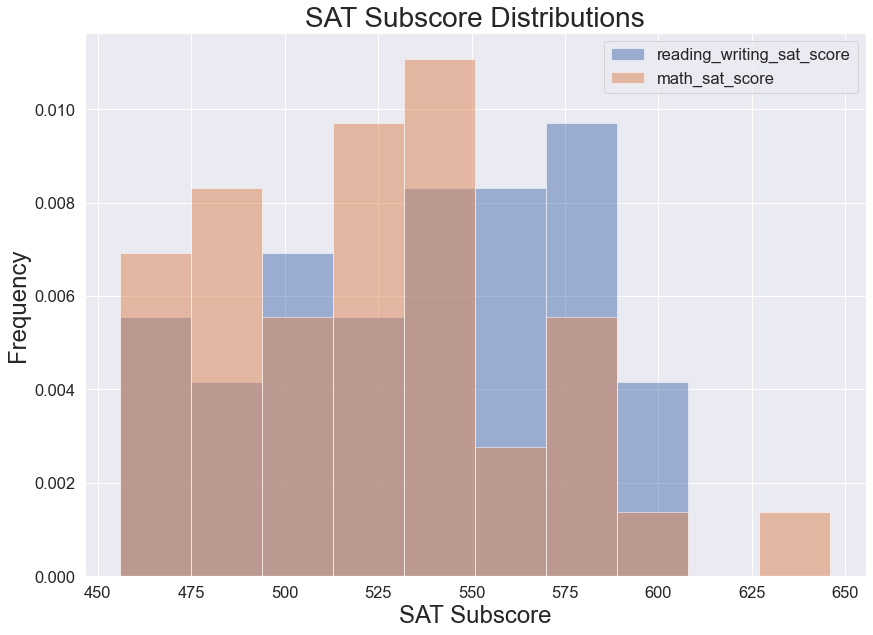

In [53]:
df_major[['reading_writing_sat_score','math_sat_score']].plot.hist(
    alpha = 0.5,density = True,figsize = (14,10));
plt.xlabel('SAT Subscore', fontsize=24);
plt.ylabel('Frequency',fontsize=24);
plt.title("SAT Subscore Distributions",fontdict = {'fontsize' : 28})
plt.savefig('../images/SAT_score_hist_overlay_math_english.png',bbox_inches='tight')

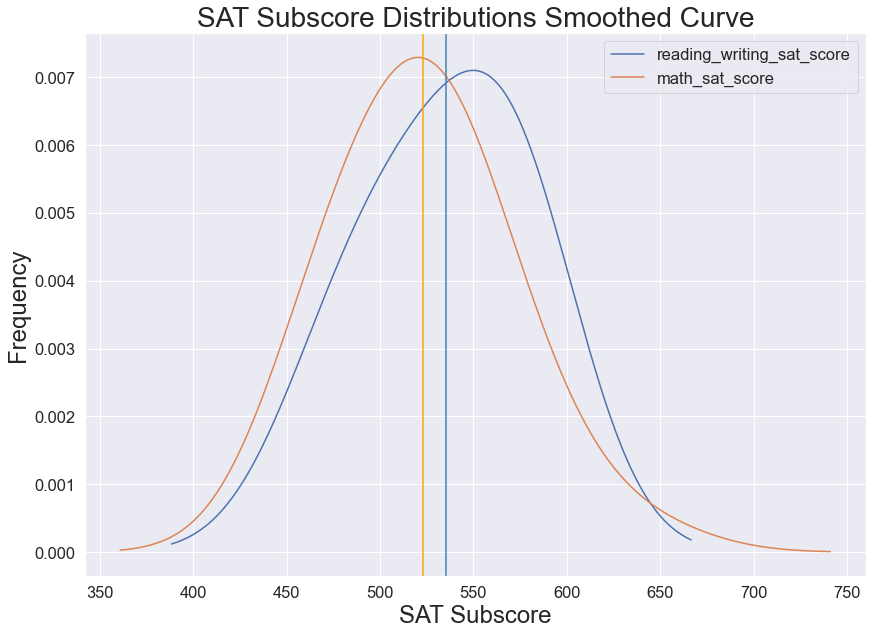

In [54]:
df_major[['reading_writing_sat_score','math_sat_score']].plot.density(bw_method = 0.8,figsize = (14,10),)
plt.axvline(df_major['math_sat_score'].mean(),color = 'orange')
plt.axvline(df_major['reading_writing_sat_score'].mean(),color = 'steelblue')
plt.xlabel('SAT Subscore', fontsize=24);
plt.ylabel('Frequency',fontsize=24);
plt.title("SAT Subscore Distributions Smoothed Curve",fontdict = {'fontsize' : 28})
plt.savefig('../images/SAT_score_density_curve_overlay_math_english.png',bbox_inches='tight')

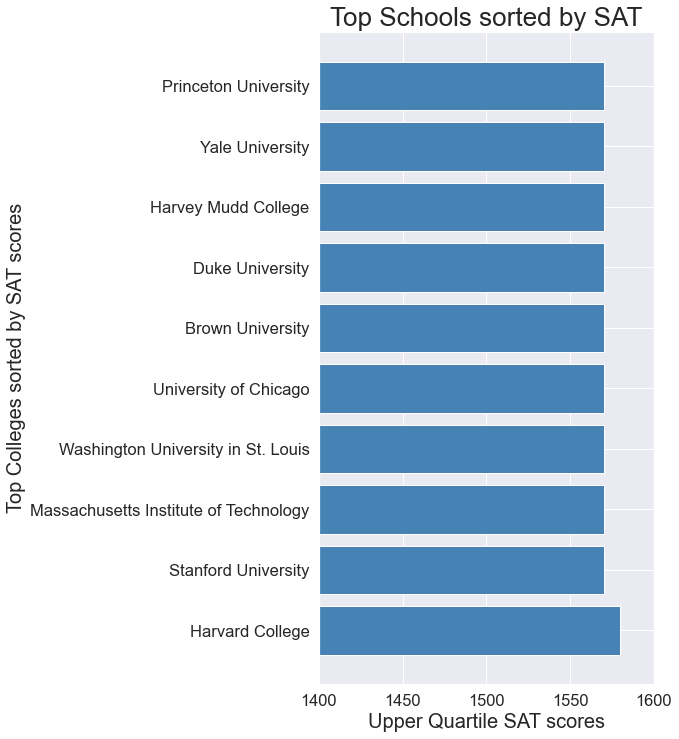

In [55]:
plt.figure(figsize = (6, 12))

plt.barh(top_colleges['school_name'], width = top_colleges['sat_upper_quartile'].sort_values(ascending = False),color = 'steelblue')
#plt.barh(top_colleges['school_name'], width = top_colleges['sat_upper_quartile'],color = 'c',bottom = top_colleges['school_name'] )
plt.xlim([1400, 1600])
plt.xlabel("Upper Quartile SAT scores",fontsize = 20)
plt.ylabel("Top Colleges sorted by SAT scores",fontsize = 20)
plt.title("Top Schools sorted by SAT",fontsize = 26)
plt.savefig('../images/top_schools_by_sat_horizontal_bar.png',bbox_inches='tight')

<Figure size 432x864 with 0 Axes>

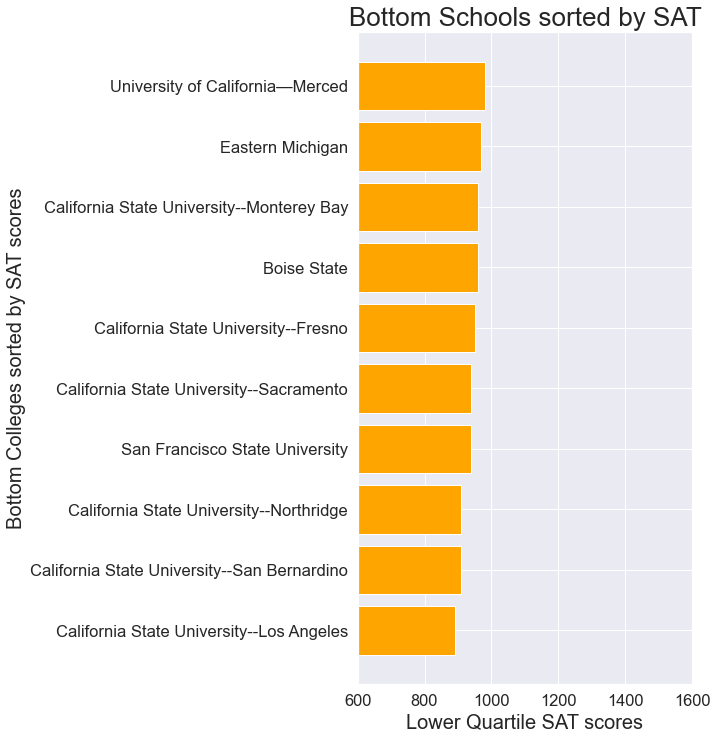

In [56]:
plt.figure(figsize = (6, 12))

plt.figure(figsize = (6, 12))
plt.barh(bottom_colleges['school_name'], width = bottom_colleges['sat_lower_quartile'],color = 'orange')
plt.xlim([600, 1600])
plt.xlabel("Lower Quartile SAT scores",fontsize = 20)
plt.ylabel("Bottom Colleges sorted by SAT scores",fontsize = 20)
plt.title("Bottom Schools sorted by SAT",fontsize = 26)
plt.savefig('../images/bottom_schools_by_sat_horizontal_bar.png',bbox_inches='tight')

#### As we can see from the above two graphs, the upper quartile gives the highest range that allows students to get into access to the "elite" schools, however some students just want the opportunity to be able to college and see what is the minimum they need to get to have a chance of gettin a better education. These students may come from underserved backgrounds or have learning challenges but still want to be able to be in the ballgame.

### This density curve is a really nice way to see the "normality" of the curve that is inherent. Obviously, this data had already been averaged prior over a large population size to create our original data set. Therefore it makes sense to use this type of smoothing curve to get a sense of the normal distribution. The SAT is designed to generate a normal curve among students at a normal level. 

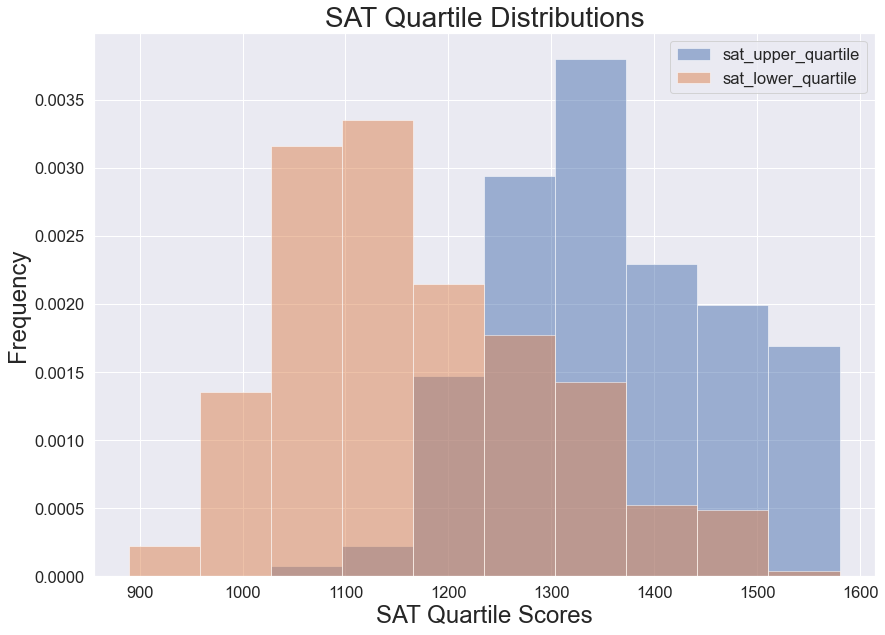

In [57]:
df_colleges[['sat_upper_quartile','sat_lower_quartile']].plot.hist(
    alpha = 0.5,density = True,figsize = (14,10),title = "SAT Lower and Upper Quartile");
plt.xlabel('SAT Quartile Scores', fontsize=24);
plt.ylabel('Frequency',fontsize=24);
plt.title("SAT Quartile Distributions",fontdict = {'fontsize' : 28})
plt.savefig('../images/SAT_score_quartile_overlay.png',bbox_inches='tight')

### These quartile scores are a neat way to see how you can have a spread between the lower and upper quartile. These "quartiles" reflect the real nature of a sample set, because as we will see in the next graph, there is a general but vaguely lingering question of "What is a good score?"

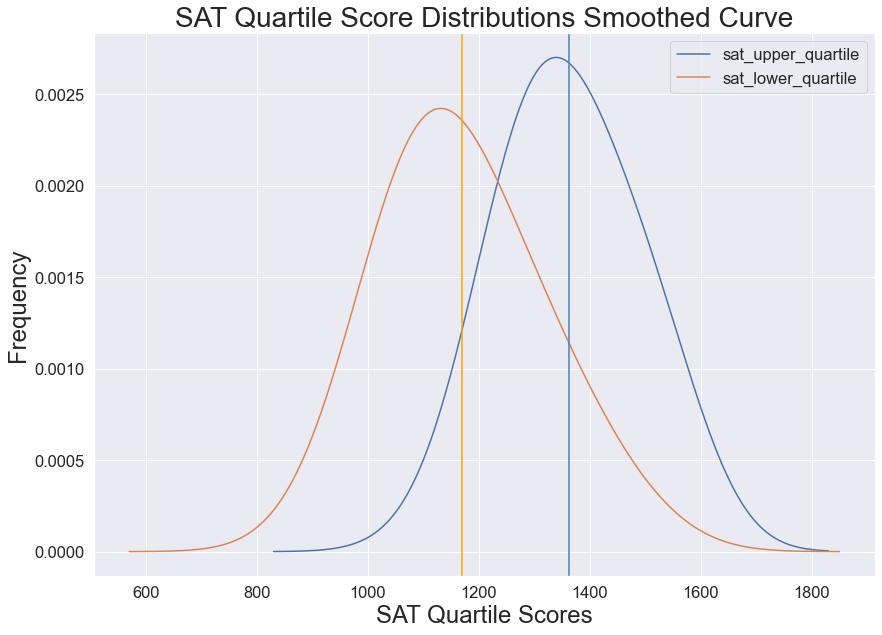

In [58]:
df_colleges[['sat_upper_quartile','sat_lower_quartile']].plot.density(figsize = (14,10),bw_method = 0.8)
plt.axvline(df_colleges['sat_lower_quartile'].mean(),color = 'orange')
plt.axvline(df_colleges['sat_upper_quartile'].mean(),color = 'steelblue')
plt.xlabel('SAT Quartile Scores', fontsize=24);
plt.ylabel('Frequency',fontsize=24);
plt.title("SAT Quartile Score Distributions Smoothed Curve",fontdict = {'fontsize' : 28})
plt.savefig('../images/SAT_quartile_score_density_curve_overlay.png',bbox_inches='tight')

### This smoothed curve tells us a little bit about what might be a good score. A good score could possibly be a minimum of 1200 and a great score is 1400 or above. This generally corresponds to real life experience with students as to how they want to perform or have performed in relation to the colleges they are targeting. 

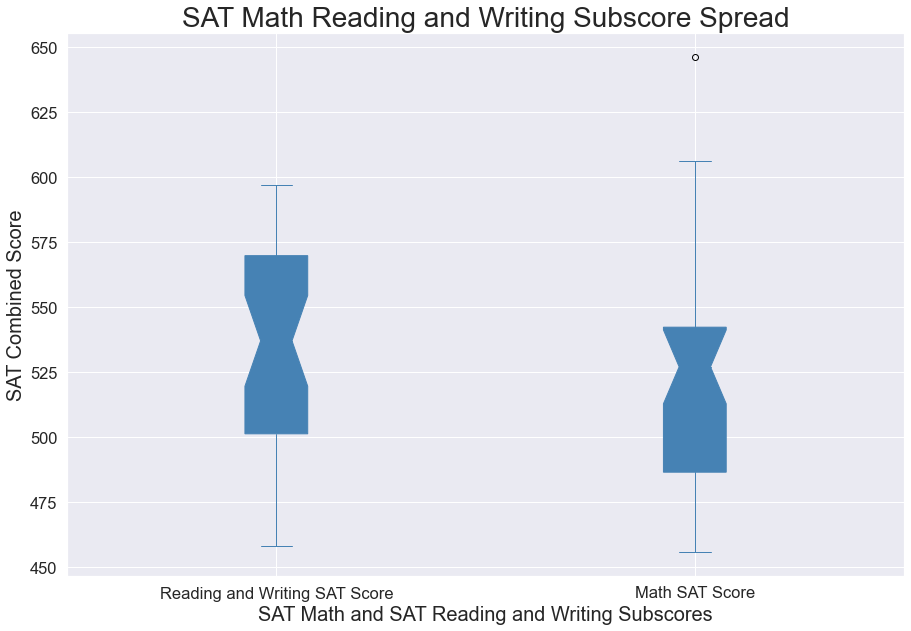

In [59]:
pd.DataFrame(({'Reading and Writing SAT Score':df_major['reading_writing_sat_score'],'Math SAT Score':df_major['math_sat_score']})).boxplot(
    color = 'steelblue',figsize = (15,10),notch=True, patch_artist=True);

plt.xlabel('SAT Math and SAT Reading and Writing Subscores', fontsize=20);
plt.ylabel('SAT Combined Score',fontsize=20);
plt.title("SAT Math Reading and Writing Subscore Spread",fontdict = {'fontsize' : 28})
plt.savefig('../images/SAT_subscore_boxplot.png',bbox_inches='tight')


### This spread of the box plot is interesting because it allows us to see quite easily that generally there is a wider "spread" of math scores in their range of values, however Math has a lower median value compared to Reading and Writing scores. Remember we must always keep in mind the context of our data set which is in this case based on college majors and the spread of SAT subscores for various college majors. 

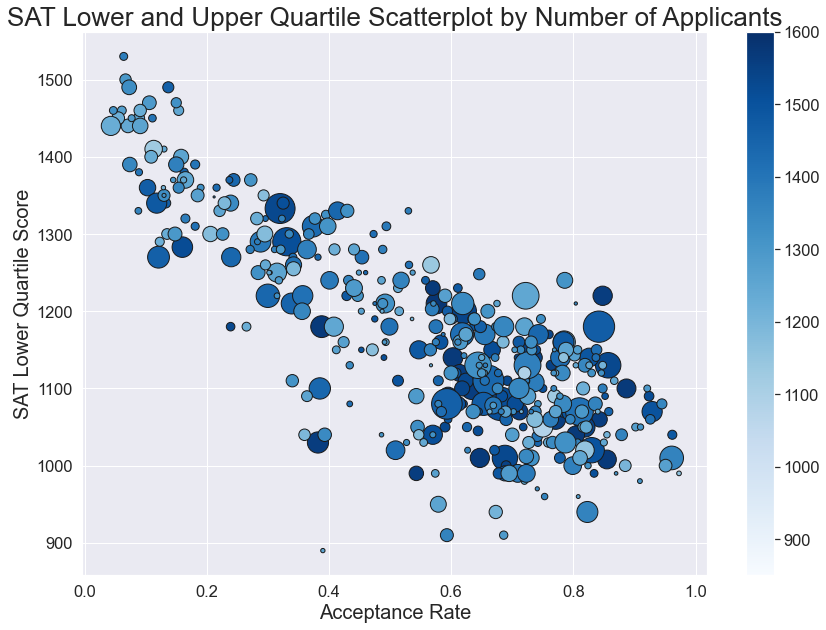

In [60]:
import matplotlib
area = 1e-2 * df_colleges['number_applicants']
colors = df_colleges['sat_upper_quartile']
df_colleges.sort_values('number_applicants').plot.scatter('acceptance_rate','sat_lower_quartile',
                         s = area,
                         figsize = (14,10),
                         linewidths = 1,

                         colormap = matplotlib.cm.get_cmap('Blues'),
                         vmin = 850,vmax = 1600,
                         edgecolors = 'k',c = colors,sharex = False,
                         title = "SAT Lower and Upper Quartile Scatterplot by Number of Applicants"
                        );
plt.xlabel('Acceptance Rate', fontsize=20);
plt.ylabel('SAT Lower Quartile Score',fontsize=20);
plt.title("SAT Lower and Upper Quartile Scatterplot by Number of Applicants",fontdict = {'fontsize' : 26});
plt.savefig('../images/SAT_quartiles_scatterplot.png',bbox_inches='tight')


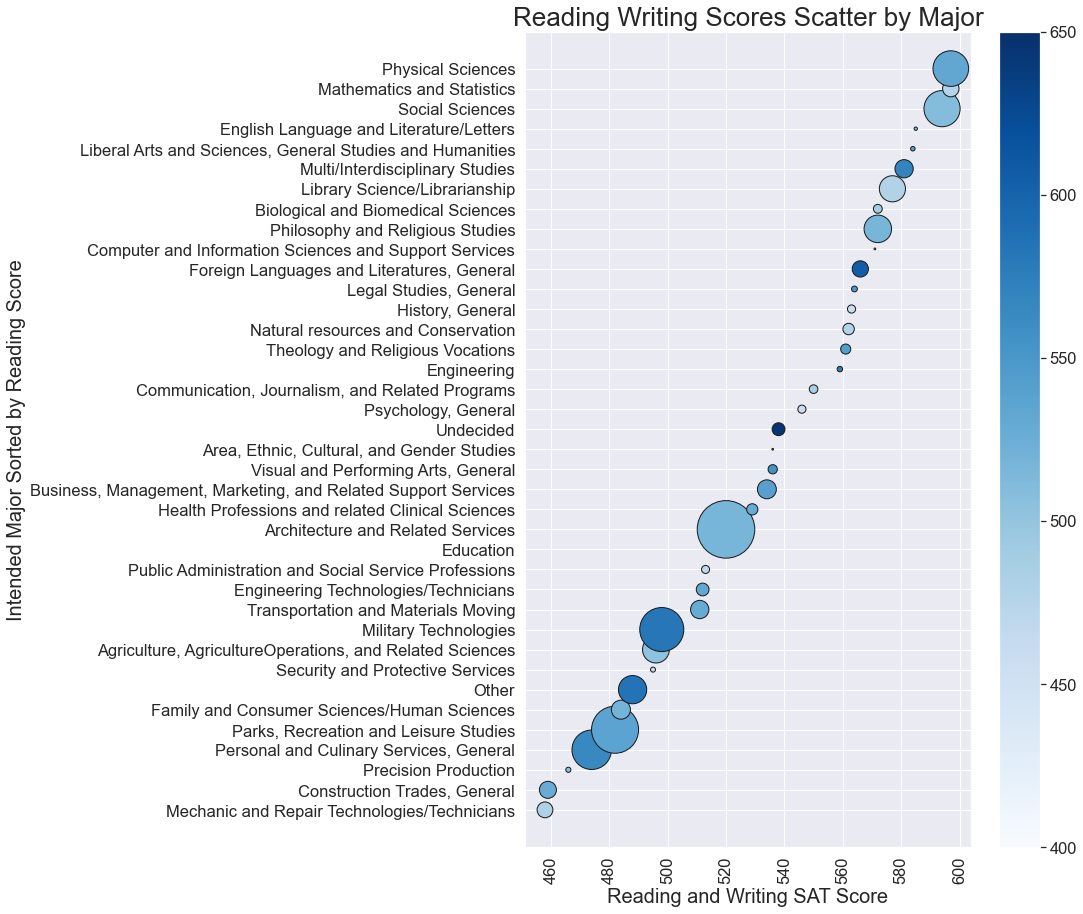

In [61]:
#df_major.info()

area = 1e-2 * df_major['test_takers_per_major']
colors = df_major['math_sat_score']
df_major.sort_values('reading_writing_sat_score').plot.scatter('reading_writing_sat_score','intended_major',
                         s = area,
                         figsize = (10,15),
                         linewidths = 1,

                         colormap = matplotlib.cm.get_cmap('Blues'),
                         vmin = 400,vmax = 650,
                         edgecolors = 'k',c = colors,sharex = False                              
                        )
plt.xticks(rotation=90);
plt.xlabel('Reading and Writing SAT Score', fontsize=20);
plt.ylabel('Intended Major Sorted by Reading Score', fontsize=20);
plt.title("Reading Writing Scores Scatter by Major",fontdict = {'fontsize' : 26});
plt.savefig('../images/intended_major_by_reading_scatterplot.png',bbox_inches='tight')


### One interesting observation here is that the apparently "lower-scoring" majors seemed to be aligned with traditionally more blue-collar jobs. In future studies, this would be a good way to tune into the bias inherent in the data set. In the high scoring data sets we see engineering fields and physical sciences, but also many "liberal arts" majors that are prized by some of the top private universities, so this makes sense. 


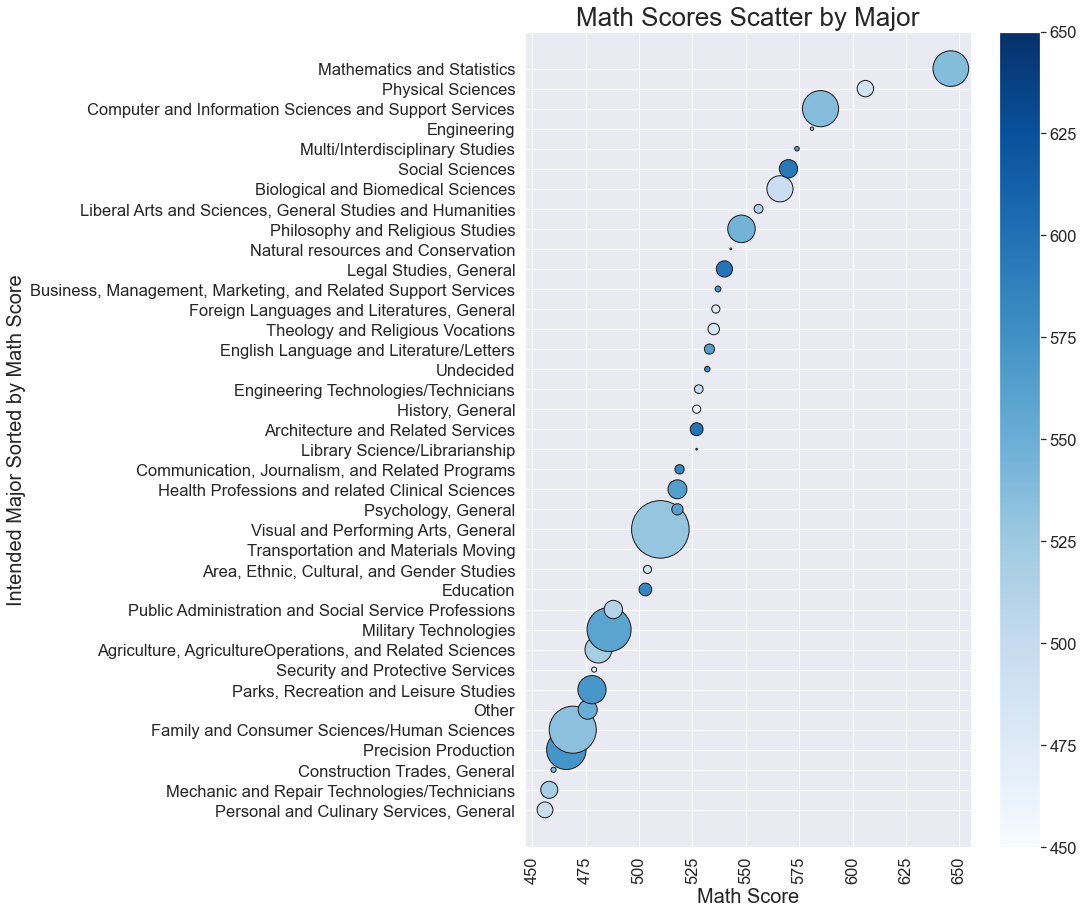

In [62]:
#df_major.info()

area = 1e-2 * df_major['test_takers_per_major']
colors = df_major['reading_writing_sat_score']
df_major.sort_values('math_sat_score').plot.scatter('math_sat_score','intended_major',
                         s = area,
                         figsize = (10,15),
                         linewidths = 1,

                         colormap = matplotlib.cm.get_cmap('Blues'),
                         vmin = 450,vmax = 650,
                         edgecolors = 'k',c = colors,sharex = False                              
                        )
plt.xticks(rotation=90);
plt.xlabel('Math Score', fontsize=20);
plt.ylabel('Intended Major Sorted by Math Score', fontsize=20);
plt.title("Math Scores Scatter by Major",fontdict = {'fontsize' : 26});
plt.savefig('../images/intended_major_by_math_scatterplot.png',bbox_inches='tight')


#### Based on all this data, we can conclude that being able to look at the subscores and SAT Quartiles of scores that correspond to certain majors or colleges is a useful way to approach becoming informed about the process. By sorting our score values we were able to understand which were the majors that correspond to which of the top scores. For example, it helps to know that if I want to pursue an engineering degree, I will probably want to make sure to have a high math score, but also a high reading and writing score (as opposed to the conventional logic of just needing math). Furthermore, this project was a beginning entry point into the world of data science. Future projects could include building a machine learning recommender system that allows one to take all of these colleges with a corresponding score and recommending automatically the best college/major for a given student's score. 

### References
#### [Split a text column into two columns in Pandas DataFrame](https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/)
#### [Delete a column from a Pandas DataFrame](https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe)
#### [Python Statistics Essential Training](https://www.linkedin.com/learning/python-statistics-essential-training/)

####  [Plotting a diagonal correlation matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
#### [seaborn.heatmap documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
#### [How do I add a title and axis labels to Seaborn Heatmap?](https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap)